In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
plt.style.use("./rw_visualization.mplstyle")

https://www.cdc.gov/brfss/annual_data/annual_2023.html

In [2]:
data_path = Path("C:/Users/chee1/Downloads/CDC_BRFSS/data/LLCP2023.ASC")

# Load data

In [3]:
# BRFSS data loading configuration
brfss_positions = [
    (315, 317),   # Cancer
    # (103, 105),   # Psychological distress
    (145, 146),   # Depression 
    (313, 315),   # Age told had cancer (Module 8-2, position 314-315)
    (71, 72),     # Gender
    (622, 624),   # Race 
    (2089, 2090), # Income
    (186, 187),   # Education
    (107, 109),   # Health insurance
    (1401, 1402), # Urban rural
    (2097, 2098), # Binge drinking 
    (224, 225),   # Ever smoking 
    (2086, 2087), # Obese
    (112, 113),   # Exercise in Past 30 Days
    (113, 115),   # Type of Physical Activity
    (115, 118),   # How many times per week
    (121, 123),   # Type of Physical Activity
    (123, 126),   # How many times per week
    (129, 132),   # Anaerobic exercise time
    (133, 134),   # Hypertension
    (136, 137),   # Dyslipidemia
    (137, 138),   # Heart attack
    (138, 139),   # Coronary heart disease
    (148, 149)    # Diabetes
]

column_names = [
    "cancer", 
    # "psychological_distress",
    "depression", 
    "age_told_had_cancer",
    "gender",
    "race", 
    "income",
    "education",
    "health_insurance",
    "urban_rural",
    "binge_drinking",
    "ever_smoking", 
    "obese",
    "exercise_past_30_days",
    "physical_activity_type_1",
    "physical_activity_frequency_1", 
    "physical_activity_type_2",
    "physical_activity_frequency_2",
    "anaerobic_exercise_time",
    "hypertension",
    "dyslipidemia", 
    "heart_attack",
    "Coronary_heart_disease",
    "diabetes"
]

# Load data
brfss_data = pd.read_fwf(
    data_path,
    colspecs=brfss_positions,
    names=column_names,
    dtype=str  
)

In [4]:
# Convert data to numeric
brfss_data = brfss_data.apply(pd.to_numeric, errors='coerce')

# View the imported data
print("First 6 rows:")
print(brfss_data.head(6))
print(f"\nData dimensions: {brfss_data.shape}")
print(f"Rows: {brfss_data.shape[0]}, Columns: {brfss_data.shape[1]}")

# Additional useful information
print(f"\nColumn names: {list(brfss_data.columns)}")
print(f"\nData types:")
print(brfss_data.dtypes)

First 6 rows:
   cancer  depression  age_told_had_cancer  gender  race  income  education  \
0     NaN         2.0                  NaN     2.0   NaN       9        5.0   
1     NaN         1.0                  NaN     2.0   NaN       9        5.0   
2     NaN         2.0                  NaN     2.0   NaN       1        4.0   
3     NaN         1.0                  NaN     2.0   NaN       9        5.0   
4     NaN         1.0                  NaN     2.0   NaN       5        5.0   
5     NaN         2.0                  NaN     2.0   NaN       5        5.0   

   health_insurance  urban_rural  binge_drinking  ...  \
0               3.0          1.0               1  ...   
1               3.0          1.0               1  ...   
2               3.0          1.0               1  ...   
3               3.0          2.0               1  ...   
4               3.0          1.0               1  ...   
5               7.0          1.0               1  ...   

   physical_activity_type_1  phy

# Extract breast cancer cases

Unique values in  cancer category': [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 77. 99. nan]
Number of data points in category 5 (breast cancer): 2243


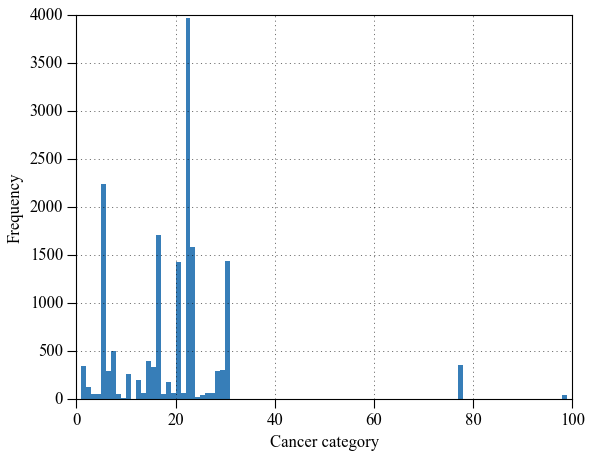

In [5]:
print(f"Unique values in  cancer category': {np.sort(brfss_data['cancer'].unique())}")
plt.figure()
brfss_data['cancer'].hist(bins=range(0, 100))
plt.xlabel("Cancer category")
plt.ylabel("Frequency")
print(f"Number of data points in category 5 (breast cancer): {brfss_data['cancer'].value_counts().get(5, 0)}")

In [6]:
breast_cancer_data = brfss_data[brfss_data['cancer'] == 5].copy()

# Remove the 'cancer' column as it is no longer needed
breast_cancer_data.drop(columns=['cancer'], inplace=True)

# NOTE: There is one case where the gender is 3. This conflicts with the BRFSS documentation.
# As there is only one case, I will remove it.
breast_cancer_data = breast_cancer_data[breast_cancer_data['gender'] != 3] # This line is optional, depending on how you want to handle this case.

# The targeting variable is 'depression' 1 and 2. I thus need to remove the other values.
breast_cancer_data = breast_cancer_data[breast_cancer_data['depression'].isin([1.0, 2.0])] 

# View the imported data
print("First 6 rows:")
print(breast_cancer_data.head(6))
print(f"\nData dimensions: {breast_cancer_data.shape}")
print(f"Rows: {breast_cancer_data.shape[0]}, Columns: {breast_cancer_data.shape[1]}")

# Additional useful information
print(f"\nColumn names: {list(breast_cancer_data.columns)}")
print(f"\nData types:")
print(breast_cancer_data.dtypes)

print(f"Total number of breast cancer cases: {len(breast_cancer_data)}")
print(f"Depression 1 (Yes): {sum(breast_cancer_data['depression']==1.0)} ({sum(breast_cancer_data['depression']==1.0)/len(breast_cancer_data)*100:.2f}%)")
print(f"Depression 2 (No): {sum(breast_cancer_data['depression']==2.0) } ({sum(breast_cancer_data['depression']==2.0)/len(breast_cancer_data)*100:.2f}%)")

First 6 rows:
       depression  age_told_had_cancer  gender  race  income  education  \
48055         2.0                 26.0     2.0   NaN       9        6.0   
48121         2.0                 42.0     NaN   NaN       3        5.0   
48122         2.0                 98.0     NaN   NaN       9        6.0   
48125         2.0                 50.0     NaN   NaN       5        6.0   
48150         1.0                 42.0     2.0   NaN       9        4.0   
48165         1.0                 55.0     2.0   NaN       9        4.0   

       health_insurance  urban_rural  binge_drinking  ever_smoking  ...  \
48055               3.0          1.0               1           2.0  ...   
48121               3.0          1.0               1           2.0  ...   
48122               3.0          1.0               1           2.0  ...   
48125               3.0          1.0               2           1.0  ...   
48150               3.0          1.0               1           1.0  ...   
48165     

# Logistic regression 

In [7]:
def logistic_regression_analysis(X, Y):
    # normalize Y to 0 and 1 since logistic regression requires binary outcomes
    Y = (Y - Y.min()) / (Y.max() - Y.min())

    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    model = sm.Logit(y_train, X_train).fit()

    print("=== Model Summary ===")
    print(model.summary())
    
    print("\n=== P-values ===")
    p_values = model.pvalues
    for variable, p_value in p_values.items():
        significance = "***" if p_value < 0.001 else "**" if p_value < 0.01 else "*" if p_value < 0.05 else ""
        print(f"{variable}: {p_value:.6f} {significance}")

    y_pred = model.predict(X_test) > 0.5
    accuracy = (y_pred == y_test).mean()
    print(f"\nAccuracy: {accuracy:.2f}")

    return model, p_value

In [8]:
X = breast_cancer_data.drop(columns=['depression'])
Y = breast_cancer_data['depression']

# The problem now is that the data contains many NaN values.
# Possible options:
# 1. Remove rows or columns with NaN values
# 2. Impute missing values
# https://datascience.stackexchange.com/questions/39058/dealing-with-nan-missing-values-for-logistic-regression-best-practices

## Remove rows with NaN values

In [9]:
X_delete_nan_rows = X.dropna()
Y_delete_nan_rows = Y[X_delete_nan_rows.index]

print(f"Number of rows after removing NaN values: {len(X_delete_nan_rows)}")


Number of rows after removing NaN values: 109


In [10]:
delete_nan_rows_model, delete_nan_rows_p_value = logistic_regression_analysis(X_delete_nan_rows, Y_delete_nan_rows)

# NOTE: convergence failed

         Current function value: 0.319238
         Iterations: 35
=== Model Summary ===
                           Logit Regression Results                           
Dep. Variable:             depression   No. Observations:                   87
Model:                          Logit   Df Residuals:                       66
Method:                           MLE   Df Model:                           20
Date:                Sun, 20 Jul 2025   Pseudo R-squ.:                  0.3738
Time:                        16:32:02   Log-Likelihood:                -27.774
converged:                      False   LL-Null:                       -44.354
Covariance Type:            nonrobust   LLR p-value:                   0.03240
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
age_told_had_cancer              -0.0059      0.034     -0.173      0.863      -0.07

c:\Users\chee1\repository\BRFSS-breast-cancer-depression\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


# Impute missing values

In [11]:
# Impute missing values with dummy variables
X_imputed = X.fillna(0)  # Replace NaN with 0

imputed_model, imputed_p_value = logistic_regression_analysis(X_imputed, Y)


Optimization terminated successfully.
         Current function value: 0.520343
         Iterations 6
=== Model Summary ===
                           Logit Regression Results                           
Dep. Variable:             depression   No. Observations:                 1784
Model:                          Logit   Df Residuals:                     1763
Method:                           MLE   Df Model:                           20
Date:                Sun, 20 Jul 2025   Pseudo R-squ.:                 0.04071
Time:                        16:32:02   Log-Likelihood:                -928.29
converged:                       True   LL-Null:                       -967.69
Covariance Type:            nonrobust   LLR p-value:                 6.281e-09
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
age_told_had_cancer               0.0164      0.

In [16]:
Y = (Y - Y.min()) / (Y.max() - Y.min())

# Use all available data for training
model = sm.Logit(Y, X_imputed).fit()

print("=== Model Summary ===")
print(model.summary())

print("\n=== P-values ===")
p_values = model.pvalues
for variable, p_value in p_values.items():
    significance = "***" if p_value < 0.001 else "**" if p_value < 0.01 else "*" if p_value < 0.05 else ""
    print(f"{variable}: {p_value:.6f} {significance}")


Optimization terminated successfully.
         Current function value: 0.519792
         Iterations 6
=== Model Summary ===
                           Logit Regression Results                           
Dep. Variable:             depression   No. Observations:                 2231
Model:                          Logit   Df Residuals:                     2210
Method:                           MLE   Df Model:                           20
Date:                Sun, 20 Jul 2025   Pseudo R-squ.:                 0.03889
Time:                        16:35:08   Log-Likelihood:                -1159.7
converged:                       True   LL-Null:                       -1206.6
Covariance Type:            nonrobust   LLR p-value:                 1.560e-11
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
age_told_had_cancer               0.0161      0.